In [1]:
from ipywidgets import interact
from MPC2_phy_proj import *

test_env()

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.86381711e-11  0.00000000e+00  7.57322474e-11]
 [ 5.86381711e-11  0.00000000e+00 -7.57322474e-11]] [-0.6569052996153647, 0.32845264980768235, 0.32845264980768235]
Typical value is -8.66e-19 or -8.754e-19 J.
Total E= -8.753229796504332e-19


# Test cell

In [3]:
O_coord = np.array([0.8974, -1.285111, 1.375674])
H_coord = np.array([0.93366, -1.620249, 0.461291])
dist(O_coord,H_coord)

0.9745401671213969

In [47]:
import math


def fibonacci_sphere(samples=1000):

    x_p = []
    y_p = []
    z_p = []
    
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        x_p.append(x)
        y_p.append(y)
        z_p.append(z)

    return x_p,y_p,z_p



def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)


   

def surf_sph(radius):
    x_p,y_p,z_p = fibonacci_sphere(samples=6) 
    if radius <= 0.5:
        mappedStart=0.5-radius
        mappedEnd=radius+0.5
        x_p_mapped = [0.5]
        for i in x_p:
            x_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))
        y_p_mapped = [0.5]
        for i in y_p:
            y_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))

        z_p_mapped = [0.5]
        for i in z_p:
            z_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))
    else:
        print('Radius is too large')
    return x_p_mapped,y_p_mapped,z_p_mapped

In [50]:
#test cell, can be run for infinite time


xa,ya,za = surf_sph(0.23)
thetar=np.random.rand(7)*np.pi*2 
phir=np.random.rand(7)*np.pi*2 
moltypes =[2,1,1,1,1,1,1]

rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
#print(constrain01(rall,0.02))


@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

# Test interactive

In [40]:
#Debugging Part 2/3

rb = ra/2*3**0.5
c = 0.5

xa,ya,za = surf_sph(i)


thetar = [0,0,0,0,0,0]
phir = np.linspace(-np.pi,+np.pi,6) 
moltypes =[1,1,1,1,1,1] 

rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
print('total E:', potl_energy_sum(rall,qall))

#print(rall,qall)
@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

total E: -5.266876395226363e-27


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

In [9]:
#Debugging Part 2/3

xa=[0.5,0.933,0.933,0.5,0.067,0.067] #x coordinates of molecule anchors
ya=[0,0.25,0.75,1,0.75,0.25] #y coordinates of molecule anchors
za=[0,0,0,0,0,0] #z coordinates of molecule anchors
thetar=[0,0,0,0,0,0] #no theta rotation for any of the molecules
#print(thetar)
phir=[3.141592653589793,4.1887902047863905,5.235987755982989,0.0,1.0471975511965976,2.0943951023931953]


moltypes =[1,1,1,1,1,1]
xyza = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)

#calculate the total E for this generated sys.
rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
rall = np.array(rall)*1e-9
potl_E_sum = potl_energy_sum(rall,qall)

print('total E:', potl_energy_sum(rall,qall))

@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

total E: -5.281986939532095e-18


interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

# Test energy only

# for two molecules

### Investigation 1D: total potential energy against distance between two charges

C:\Users\AlbertCielstian\Documents\file_Chemistry_BSc\yr2_MPC2_phy_proj\MPC2_phy_proj.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  V=K * (q1*e/dist(r0,r1))


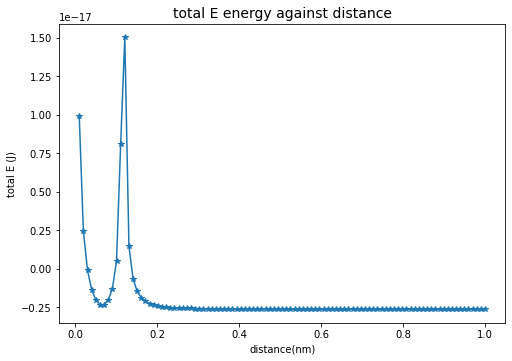

In [7]:
ditance_bw_charges = np.linspace(0,1,100)
total_E_two_charges = []

for i in ditance_bw_charges:
    xa = [0,i] 
    ya = [0.3,0.3] 
    za = [0.3,0.3]

    thetar = [0,0] 
    phir = [0,np.pi] 
    moltypes =[1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against distance',fontsize=14)
plt.plot(ditance_bw_charges, total_E_two_charges, marker='*')

plt.xlabel('distance(nm)')
plt.ylabel('total E (J)')
plt.show();

In [8]:
np.array([total_E_two_charges[:20]])*1e17

array([[        inf,  0.99350054,  0.24335936, -0.01049173, -0.13522079,
        -0.20198368, -0.23238317, -0.23327431, -0.20349494, -0.12929106,
         0.0491759 ,  0.80785451,  1.50268081,  0.14763133, -0.06510411,
        -0.14699543, -0.18802346, -0.21142129, -0.22585073, -0.23524155]])

In [9]:
np.array([ditance_bw_charges[:20]])

array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919]])

In [10]:
0.13131313*1e-17

1.3131313000000001e-18

### Investigation 1D: total potential energy against theta for one molecule

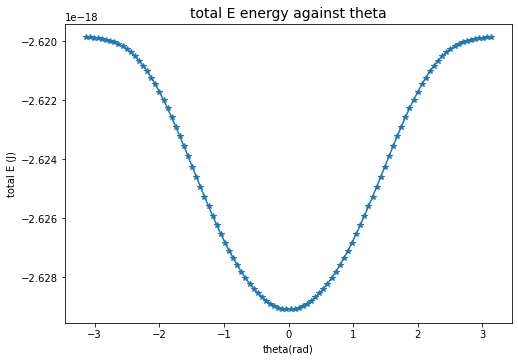

In [11]:
theta_for_one_mo = np.linspace(-np.pi,np.pi,100)
total_E_two_charges = []

for i in theta_for_one_mo:
    xa = [0,0.6] 
    ya = [0.3,0.3] 
    za = [0.3,0.3]

    thetar = [0,i] 
    phir = [0,0] 
    moltypes =[1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against theta',fontsize=14)
plt.plot(theta_for_one_mo, total_E_two_charges, marker='*')

plt.xlabel('theta(rad)')
plt.ylabel('total E (J)')
plt.show();

### Investigation 1D: total potential energy against phi for one molecule

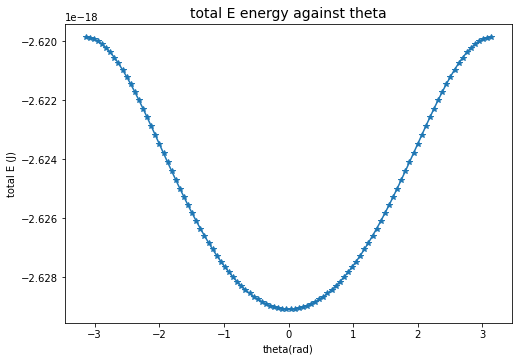

In [12]:
phi_for_one_mo = np.linspace(-np.pi,np.pi,100)
total_E_two_charges = []

for i in phi_for_one_mo:
    xa = [0,0.6] 
    ya = [0.3,0.3] 
    za = [0.3,0.3]

    thetar = [0,0] 
    phir = [0,i] 
    moltypes =[1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against theta',fontsize=14)
plt.plot(phi_for_one_mo, total_E_two_charges, marker='*')

plt.xlabel('theta(rad)')
plt.ylabel('total E (J)')
plt.show();

# for three molecules system

### Investigation 1D: total potential energy against distance between two charges

C:\Users\AlbertCielstian\Documents\file_Chemistry_BSc\yr2_MPC2_phy_proj\MPC2_phy_proj.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  V=K * (q1*e/dist(r0,r1))


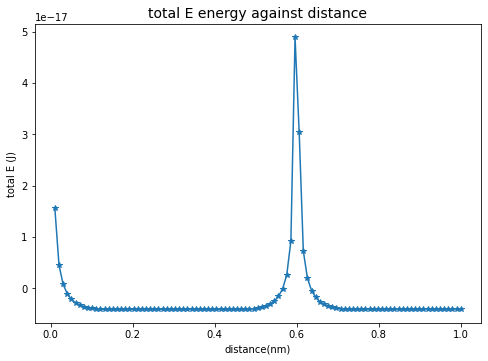

In [13]:
ditance_bw_charges = np.linspace(0,1,100)
total_E_two_charges = []

for i in ditance_bw_charges:
    xa = [0,i,0.6] 
    ya = [0.3,0.3,0.3] 
    za = [0.3,0.3,0.3]

    thetar = [0,0,0] 
    phir = [0,0,0] 
    moltypes =[1,1,1]  

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against distance',fontsize=14)
plt.plot(ditance_bw_charges, total_E_two_charges, marker='*')

plt.xlabel('distance(nm)')
plt.ylabel('total E (J)')
plt.show();



### Investigation 1D: total potential energy against theta for one molecule

In [14]:
'''    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against theta',fontsize=14)
plt.plot(theta_for_one_mo, total_E_two_charges, marker='*')

plt.xlabel('theta(rad)')
plt.ylabel('total E (J)')
plt.show();'''

"    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)\n    rall = np.array(rall)*1e-9\n\n    potl_E_sum = potl_energy_sum(rall,qall)\n    total_E_two_charges.append(potl_E_sum)\n\n\nplt.figure(figsize=(8,5.5)) \nplt.title('total E energy against theta',fontsize=14)\nplt.plot(theta_for_one_mo, total_E_two_charges, marker='*')\n\nplt.xlabel('theta(rad)')\nplt.ylabel('total E (J)')\nplt.show();"

### Investigation 1D: total potential energy against phi for one molecule

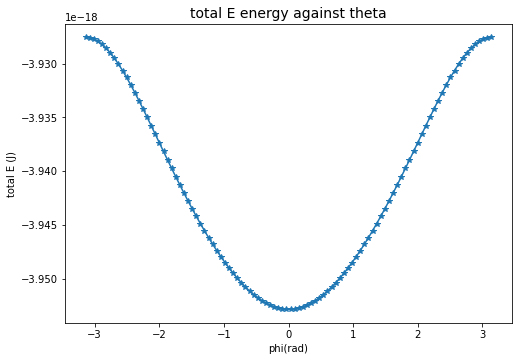

In [15]:
phi_for_one_mo = np.linspace(-np.pi,np.pi,100)
total_E_two_charges = []

for i in phi_for_one_mo:
    xa = [0,0.3,0.6] 
    ya = [0.3,0.3,0.3] 
    za = [0.3,0.6,0.3]

    thetar = [0,0,0] 
    phir = [0,i,0] 
    moltypes =[1,1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against theta',fontsize=14)
plt.plot(phi_for_one_mo, total_E_two_charges, marker='*')

plt.xlabel('phi(rad)')
plt.ylabel('total E (J)')
plt.show();

### three degree of freedom of phi angles of three mo.

In [16]:
phi_list = np.linspace(-np.pi,np.pi,4)
phi01, phi02, phi03 = np.meshgrid(phi_list, phi_list,phi_list)


In [17]:
total_E_two_charges = []

for i in range(len(phi01)):
        pinlistV1=[]
        for j in range(len(phi01[i])):
            pinlistV2=[]

            for k in range(len(phi01[i][j])):
                r0 = np.array([phi01[i][j][k],phi02[i][j][k],phi03[i][j][k]])
                #Calcluate 1D potl for each in 3D
                
                xa = [0,0.3,0.6] 
                ya = [0.3,0.3,0.3] 
                za = [0.3,0.3,0.3]

                thetar = [0,0,0] 
                phir = [phi01[i][j][k],phi02[i][j][k],phi03[i][j][k]] 
                moltypes =[1,1,1] 

                rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
                rall = np.array(rall)*1e-9

                potl_E_sum = potl_energy_sum(rall,qall)

                pinlistV2.append(potl_E_sum)
            pinlistV1.append(pinlistV2)
        total_E_two_charges.append(pinlistV1)


In [18]:
np.max(total_E_two_charges)

-3.903056128141292e-18

# for six molecules

## electrostatic energy against total distance

In [10]:
def total_dist(ri):
    '''
    calculate the total distance between each pair of atoms
    '''
    tot_value=0 #initialise the total potential energy
    chargeadded=[] #list of indices of charges already added
    for loop in range(len(ri)): #loop over each charge in turn
        #....incomplete code below which you can use as a starting point
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            tot_value_ij=dist(ri[j],ri[loop])
            #print('Adding PE %.2e [units] of bringing charge %d towards charge %d' % (Uij,loop,j))
            tot_value=tot_value+tot_value_ij
        chargeadded.append(loop) #add the index of the added charge to the list
    return tot_value 

In [11]:
def constrain01(xyz_coord,threshold):
    chargeadded=[] #list of indices of charges already added
    for loop in range(len(xyz_coord)): #loop over each charge in turn
        for j in chargeadded: #loop over charges already added (bringing charge loop towards charge j)            
            tot_value_ij=dist(xyz_coord[j],xyz_coord[loop])
            if tot_value_ij<threshold:
                return True
        chargeadded.append(loop)

In [12]:
xa=np.random.rand(2)
ya=np.random.rand(2)
za=np.random.rand(2)

xyza = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)
print(type(xyza))

<class 'numpy.ndarray'>


In [22]:




testcoord = np.array([[0.08974, -0.1285111, 0.1375674],
                      [-0.1559218, -0.0241778, 0.14234739999999999], 
                      [0.2090789, 0.09844520000000001, -0.0045693]])
print(constrain01(testcoord,0.266))


None


In [13]:
import math


def fibonacci_sphere(samples=1000):

    x_p = []
    y_p = []
    z_p = []
    
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        x_p.append(x)
        y_p.append(y)
        z_p.append(z)

    return x_p,y_p,z_p




def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)





'''mappedStart=0.25
mappedEnd=0.75
x_p_mapped = []
for i in x_p:
    x_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))

y_p_mapped = []
for i in y_p:
    y_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))

z_p_mapped = []
for i in z_p:
    z_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))
    
x_p,y_p,z_p = fibonacci_sphere(samples=6)    
x_p_mapped,y_p_mapped,z_p_mapped'''

'mappedStart=0.25\nmappedEnd=0.75\nx_p_mapped = []\nfor i in x_p:\n    x_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))\n\ny_p_mapped = []\nfor i in y_p:\n    y_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))\n\nz_p_mapped = []\nfor i in z_p:\n    z_p_mapped.append(translate(i,-1,1,mappedStart,mappedEnd))\n    \nx_p,y_p,z_p = fibonacci_sphere(samples=6)    \nx_p_mapped,y_p_mapped,z_p_mapped'

potl_E_sum: -5.276342167390425e-18 J


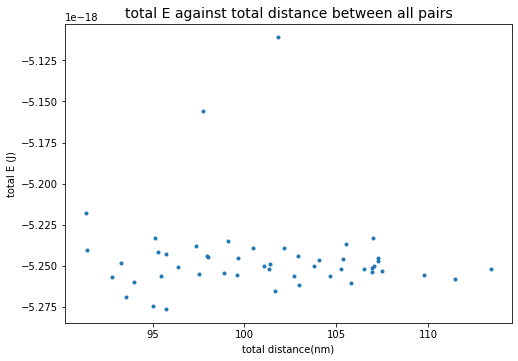

interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

In [14]:
ditance_bw_all = []
total_E_all = []

datasets = []
for i in range(50):
    
    xa=[0.5,
    0.20505244876867207,
    0.5428296831899158,
    0.7980729498156808,
    0.10611460587382854,
    np.random.rand(1)[0]]
    ya=[1.0, 0.8, 0.6, 0.4, 0.19999999999999996, np.random.rand(1)[0]]
    za=[0.5,
    0.7701961177046095,
    0.011977850668792478,
    0.8887833800308066,
    0.4303272198482754,
    np.random.rand(1)[0]]
    thetar=np.random.rand(6)*np.pi*2 
    phir=np.random.rand(6)*np.pi*2 
    
    datasets.append([moltypes,xa,ya,za,phir,thetar])
    np.random.rand(1)
    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    while constrain01(rall,0.05):
        
        xa=[0.5,
      0.20505244876867207,
      0.5428296831899158,
      0.7980729498156808,
      0.10611460587382854,
      np.random.rand(1)[0]]
        ya=[1.0, 0.8, 0.6, 0.4, 0.19999999999999996, np.random.rand(1)[0]]
        za=[0.5,
      0.7701961177046095,
      0.011977850668792478,
      0.8887833800308066,
      0.4303272198482754,
      np.random.rand(1)[0]]
        thetar=np.random.rand(6)*np.pi*2 
        phir=np.random.rand(6)*np.pi*2 
        
        
        # thetar=np.random.rand(6)
        # phir=np.random.rand(6)

        rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
        
    ditance_bw_all.append(total_dist(rall))

    rall = np.array(rall)*1e-9
    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_all.append(potl_E_sum)


total_E_all = np.array(total_E_all)
datasets = np.array(datasets)
lowest_index = np.argmin(total_E_all)

rall,qall = allatomposns(datasets[lowest_index][0],datasets[lowest_index][1],datasets[lowest_index][2],\
                         datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5])
rall = np.array(rall)*1e-9

potl_E_sum = potl_energy_sum(rall,qall)
print('potl_E_sum:',potl_E_sum, 'J')
    
    
    

plt.figure(figsize=(8,5.5)) 
plt.title('total E against total distance between all pairs',fontsize=14)
plt.plot(ditance_bw_all, total_E_all, marker='.',linestyle = '')

plt.xlabel('total distance(nm)')
plt.ylabel('total E (J)')
plt.show();



#plot the lowest e atoms posi.
@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1 = mol_plot(moltypes,datasets[lowest_index][1],datasets[lowest_index][2],\
                      datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5])
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

In [25]:
'''
# one of the arrangement Hexagon

        rand_p=np.random.rand(1)
        a=1/6
        b=a*3**0.5
        
        xa=[0,0,0,0,0,0] 
        ya=[a,2*a,4*a,5*a,4*a,np.random.rand(1)[0]] 
        za=[a+b,a+2*b,a+2*b,a+b,a,np.random.rand(1)[0]]
        #thetar=np.random.rand(6)*np.pi*2 
        #phir=np.random.rand(6)*np.pi*2 
        thetar=[0,0,0,0,0,0] 
        phir=[0,0,0,0,0,0] 
        moltypes=[1,1,1,1,1,1] '''

'\n# one of the arrangement Hexagon\n\n        rand_p=np.random.rand(1)\n        a=1/6\n        b=a*3**0.5\n        \n        xa=[0,0,0,0,0,0] \n        ya=[a,2*a,4*a,5*a,4*a,np.random.rand(1)[0]] \n        za=[a+b,a+2*b,a+2*b,a+b,a,np.random.rand(1)[0]]\n        #thetar=np.random.rand(6)*np.pi*2 \n        #phir=np.random.rand(6)*np.pi*2 \n        thetar=[0,0,0,0,0,0] \n        phir=[0,0,0,0,0,0] \n        moltypes=[1,1,1,1,1,1] '

In [26]:
'''#second arrangement: sphere surface


        xa=[0.5,
      0.20505244876867207,
      0.5428296831899158,
      0.7980729498156808,
      0.10611460587382854,
      np.random.rand(1)[0]]
        ya=[1.0, 0.8, 0.6, 0.4, 0.19999999999999996, np.random.rand(1)[0]]
        za=[0.5,
      0.7701961177046095,
      0.011977850668792478,
      0.8887833800308066,
      0.4303272198482754,
      np.random.rand(1)[0]]
        thetar=np.random.rand(6)*np.pi*2 
        phir=np.random.rand(6)*np.pi*2 '''

'#second arrangement: sphere surface\n\n\n        xa=[0.5,\n      0.20505244876867207,\n      0.5428296831899158,\n      0.7980729498156808,\n      0.10611460587382854,\n      np.random.rand(1)[0]]\n        ya=[1.0, 0.8, 0.6, 0.4, 0.19999999999999996, np.random.rand(1)[0]]\n        za=[0.5,\n      0.7701961177046095,\n      0.011977850668792478,\n      0.8887833800308066,\n      0.4303272198482754,\n      np.random.rand(1)[0]]\n        thetar=np.random.rand(6)*np.pi*2 \n        phir=np.random.rand(6)*np.pi*2 '

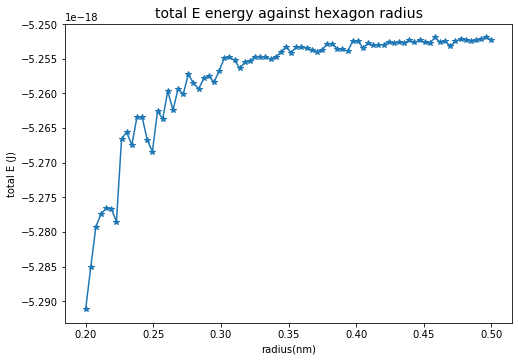

In [44]:
np.random.rand(6)*np.pi*2 


raList = np.linspace(0.2,0.5,80)

total_E_two_charges = []


for ra in raList:
    avg_e_L = []
    for i in range(800):
        rb = ra/2*3**0.5
        c = 0.5

        xa =  [c,c+rb,c+rb,c,c-rb,c-rb]
        ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
        za = [0,0,0,0,0,0] 

        thetar = np.random.rand(6)*np.pi*2
        phir = np.linspace(-np.pi,+np.pi,6) 
        moltypes =[1,1,1,1,1,1] 

        rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
        rall = np.array(rall)*1e-9

        potl_E_sum = potl_energy_sum(rall,qall)
        
        avg_e_L.append(potl_E_sum)
    total_E_two_charges.append(np.mean(avg_e_L))


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against hexagon radius',fontsize=14)
plt.plot(raList, total_E_two_charges, marker='*')

plt.xlabel('radius(nm)')
plt.ylabel('total E (J)')
plt.show();

## electrostatic energy against hexagon radius

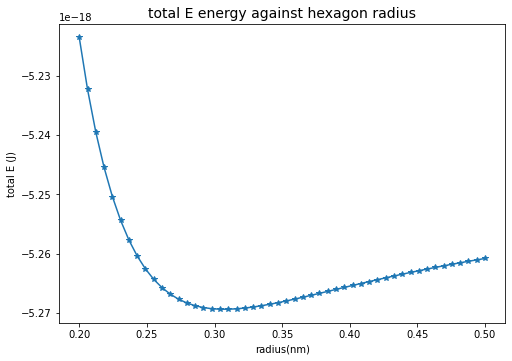

In [41]:
raList = np.linspace(0.2,0.5,50)

total_E_two_charges = []


for ra in raList:
    
    rb = ra/2*3**0.5
    c = 0.5
    
    xa =  [c,c+rb,c+rb,c,c-rb,c-rb]
    ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
    za = [0,0,0,0,0,0] 

    thetar = [0,0,0,0,0,0]
    phir = np.linspace(-np.pi,+np.pi,6) 
    moltypes =[1,1,1,1,1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against hexagon radius',fontsize=14)
plt.plot(raList, total_E_two_charges, marker='*')

plt.xlabel('radius(nm)')
plt.ylabel('total E (J)')
plt.show();

## electrostatic energy and theta rotation

In [34]:
tota = np.linspace(-np.pi,+np.pi,6)
tota

array([-3.14159265, -1.88495559, -0.62831853,  0.62831853,  1.88495559,
        3.14159265])

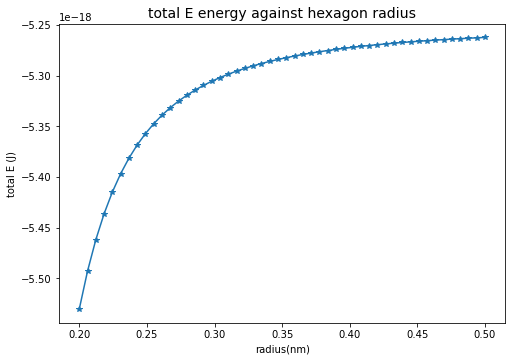

In [17]:
raList = np.linspace(0.2,0.5,50)

total_E_two_charges = []


for ra in raList:
    
    rb = ra/2*3**0.5
    c = 0.5
    
    xa = [0,0,0,0,0,0] 
    ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
    za = [c,c+rb,c+rb,c,c-rb,c-rb]

    thetar = np.linspace(-np.pi,+np.pi,6) 
    phir = [0,0,0,0,0,0] 
    moltypes =[1,1,1,1,1,1] 

    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    rall = np.array(rall)*1e-9

    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_two_charges.append(potl_E_sum)


plt.figure(figsize=(8,5.5)) 
plt.title('total E energy against hexagon radius',fontsize=14)
plt.plot(raList, total_E_two_charges, marker='*')

plt.xlabel('radius(nm)')
plt.ylabel('total E (J)')
plt.show();

## real ice structure

In [29]:
H = 0.2
l = 0.276 #O-O length in nm
lV = l*np.cos(75.7/180*np.pi)
lH = l*np.sin(75.7/180*np.pi)

In [30]:
H = 0.2
l = 0.276 #O-O length in nm
lV = l*np.cos(75.7/180*np.pi)
lH = l*np.sin(75.7/180*np.pi)


xa = [H,H+lV,H,H+lV,H,H+lV] 
ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
za = [c,c+rb,c+rb,c,c-rb,c-rb]

thetar = [0,0,0,0,0,0] 
phir = [np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2] 
moltypes =[1,1,1,1,1,1] 

In [30]:
#Debugging Part 2/3

H = 0.2
l = 0.276 #O-O length in nm
lV = l*np.cos(75.7/180*np.pi)
lH = l*np.sin(75.7/180*np.pi)

ra=lH
rb = ra/2*3**0.5
c = 0.5


xa = [H,H+lV,H,H+lV,H,H+lV] 
ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
za = [c,c+rb,c+rb,c,c-rb,c-rb]

thetar = [0,-52.25/180*np.pi,0,-52.25/180*np.pi,0,-52.25/180*np.pi]
phir = [-71/180*np.pi,-60/180*np.pi,-71/180*np.pi,-60/180*np.pi,-71/180*np.pi,-60/180*np.pi]
moltypes =[1,1,1,1,1,1] 

rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
print('total E:', potl_energy_sum(rall,qall))

print(rall,qall)
@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

total E: -5.259811038390616e-27
[array([0.2       , 0.23255166, 0.5       ]), array([0.21909072, 0.17710818, 0.57573225]), array([0.21909072, 0.17710818, 0.42426775]), array([0.26817173, 0.36627583, 0.73161706]), array([0.31606173, 0.28332792, 0.73161706]), array([0.25618103, 0.38704433, 0.63888788]), array([0.2       , 0.63372417, 0.73161706]), array([0.21909072, 0.57828069, 0.80734931]), array([0.21909072, 0.57828069, 0.65588481]), array([0.26817173, 0.76744834, 0.5       ]), array([0.31606173, 0.68450043, 0.5       ]), array([0.25618103, 0.78821684, 0.40727082]), array([0.2       , 0.63372417, 0.26838294]), array([0.21909072, 0.57828069, 0.34411519]), array([0.21909072, 0.57828069, 0.19265069]), array([0.26817173, 0.36627583, 0.26838294]), array([0.31606173, 0.28332792, 0.26838294]), array([0.25618103, 0.38704433, 0.17565376])] [-0.6569052996153647, 0.32845264980768235, 0.32845264980768235, -0.6569052996153647, 0.32845264980768235, 0.32845264980768235, -0.6569052996153647, 0.3284526

interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

## random six

potl_E_sum: -5.328069086616345e-18 J


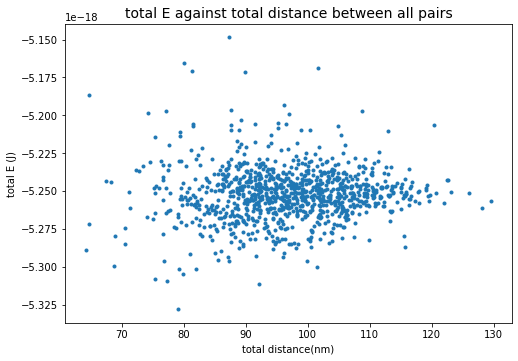

interactive(children=(IntSlider(value=30, description='elevpara', max=90, min=-27, step=3), IntSlider(value=-6…

In [31]:
ditance_bw_all = []
total_E_all = []

datasets = []
for i in range(1000):
    # generate a set of coord.
    xa=np.random.rand(6)
    ya=np.random.rand(6)
    za=np.random.rand(6)
    thetar=np.random.rand(6)*np.pi*2 
    phir=np.random.rand(6)*np.pi*2 
    xyza = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)
   
    while constrain01(xyza,0.24): # test the genrated coord. set, if dist bw O-O < threshold
        #inside the loop, generate another set
        xa=np.random.rand(6)
        ya=np.random.rand(6)
        za=np.random.rand(6)
        thetar=np.random.rand(6)*np.pi*2 
        phir=np.random.rand(6)*np.pi*2 
        xyza = np.stack((np.array(xa), np.array(ya),np.array(za)), axis=-1)
        
        if constrain01(xyza,0.266):# test if the set is still:dist bw O-O < 0.266
            continue# go to the beginning and re-genrate
        else:# find the dist bw O-O >= 0.266
            #calcuate the rall and qall            
            break# end the loop, this coord. set is generated successfully.

    # then, use this generated coord, save the data
    rall,qall = allatomposns(moltypes,xa,ya,za,phir,thetar)
    datasets.append([moltypes,xa,ya,za,phir,thetar])# all the succeed coord. set is saved here
     
    #calculate the total distance
    ditance_bw_all.append(total_dist(rall))
    #calculate the total E_energy
    rall = np.array(rall)*1e-9
    potl_E_sum = potl_energy_sum(rall,qall)
    total_E_all.append(potl_E_sum)# all the total E_energy of the succeed coord. set are saved here

#------the coord. set finish generating------
#for all the successfully generated coord. sets, find the lowest one
total_E_all = np.array(total_E_all)
datasets = np.array(datasets)
lowest_index = np.argmin(total_E_all)

# calculate the lowest energy 
rall,qall = allatomposns(datasets[lowest_index][0],datasets[lowest_index][1],datasets[lowest_index][2],\
                         datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5])
rall = np.array(rall)*1e-9
potl_E_sum = potl_energy_sum(rall,qall)
print('potl_E_sum:',potl_E_sum, 'J')
    

#-------plot------
#plot all the possible coord.
plt.figure(figsize=(8,5.5)) 
plt.title('total E against total distance between all pairs',fontsize=14)
plt.plot(ditance_bw_all, total_E_all, marker='.',linestyle = '')

plt.xlabel('total distance(nm)')
plt.ylabel('total E (J)')
plt.show();

#-------plot------
#plot the lowest E atoms posi.(interactive)
@interact
def make_plot_2(elevpara=(-27,90,3),azimpara=(-117,0,3)):
    f1,ax1 = mol_plot(moltypes,datasets[lowest_index][1],datasets[lowest_index][2],\
                      datasets[lowest_index][3],datasets[lowest_index][4],datasets[lowest_index][5])
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

# Water Hexamer

## Prime isomer

In [5]:
rall =  [[0.08974, -0.1285111, 0.1375674], [0.093366, -0.16202490000000003, 0.046129100000000006], [0.15384240000000002, -0.05632700000000001, 0.13259810000000002], [-0.1559218, -0.0241778, 0.14234739999999999], [-0.20641020000000002, -0.05019660000000001, 0.2197464], [-0.06776560000000001, -0.0678646, 0.1525237], [0.2090789, 0.09844520000000001, -0.0045693], [0.1258568, 0.1498421, -0.0018646000000000001], [0.2788216, 0.16420980000000002, -0.0093886], [-0.0447032, 0.202126, 0.0012114], [-0.0903998, 0.1539985, 0.0716909], [-0.09110810000000001, 0.1700472, -0.0771056], [-0.1776681, -0.0211411, -0.1351176], [-0.2560698, -0.05161790000000001, -0.18140610000000001], [-0.1949801, -0.0387242, -0.040953], [0.09244000000000001, -0.1339405, -0.14323950000000002], [0.0044626, -0.0992399, -0.16352670000000002], [0.14665809999999999, -0.0545087, -0.13404100000000002]]
qall =  [-0.8043375515414669, 0.40216877577073346, 0.40216877577073346, -0.8043375515414669, 0.40216877577073346, 0.40216877577073346, -0.8043375515414669, 0.40216877577073346, 0.40216877577073346, -0.8043375515414669, 0.40216877577073346, 0.40216877577073346, -0.8043375515414669, 0.40216877577073346, 0.40216877577073346, -0.8043375515414669, 0.40216877577073346, 0.40216877577073346]

In [4]:
rall = np.array(rall)*1E-9
print('total E:', potl_energy_sum(rall,qall))

total E: -5.2819869395320895e-09


## Crown Isomer

# End of notebook.

In [5]:
#Debugging Part 2/3

xa = [H,H+lV,H,H+lV,H,H+lV] 
ya = [c-ra,c-ra/2,c+ra/2,c+ra,c+ra/2,c-ra/2] 
za = [c,c+rb,c+rb,c,c-rb,c-rb]

thetar = [0,0,0,0,0,0] 
phir = [np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2] 
moltypes =[1,1,1,1,1,1] 




@interact
def make_plot_2(elevpara=(-27,90,1),azimpara=(-117,0,1)):
    f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')
    ax1.set_zlabel('z (nm)')
    ax1.set_title('molecule positions')
    ax1.set_aspect('auto')
    ax1.view_init(elev=elevpara, azim=azimpara) #adjust 'camera angle' with this command if desired - angles are in degrees
    f1.show();

NameError: name 'H' is not defined

<ipython-input-35-eb38e1bdd318>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


-7.868657177533296e-27


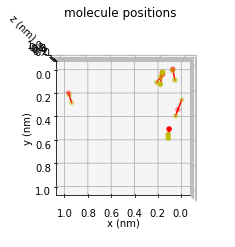

In [35]:
#define molecule anchor positions and orientations here
#below values are for just two molecules; to add more molecules to the list, add new elements to each array

#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
xa=np.random.rand(6) #x coordinates of molecule anchors
ya=np.random.rand(6) #y coordinates of molecule anchors
za=np.random.rand(6) #z coordinates of molecule anchors
thetar=np.random.rand(6)*np.pi*2 #no theta rotation for any of the molecules
phir=np.random.rand(6)*np.pi*2 #no phi rotation for any of the molecules
moltypes=[1,1,1,1,1,1] #code to indicate what type of molecule each one is.  type=0 for CO2, 1 for water

#%matplotlib notebook

f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
#add labels
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')
ax1.set_zlabel('z (nm)')
ax1.set_title('molecule positions')
ax1.set_aspect('auto')
ax1.view_init(elev=90., azim=90) #adjust 'camera angle' with this command if desired - angles are in degrees
f1.show()



#Example of calling function allatomposns() to get the coordinates and charges of all atoms in a list
rall,qall=allatomposns(moltypes,xa,ya,za,phir,thetar)


# Use the function provided above to get the position coordinates of all 18 atoms and the corresponding charge
r_randMolecules = rall
q_randMolecules = qall

print(potl_energy_sum(rall,qall))


potl_E_sum = -1.3123192169132227e-18 J


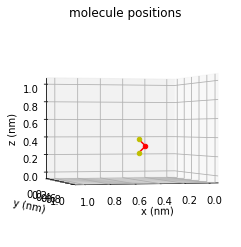

In [36]:
xa=np.array([0.3]) #x coordinates of molecule anchors
ya=np.array([0.3]) #y coordinates of molecule anchors
za=np.array([0.3]) #z coordinates of molecule anchors
thetar=[0] #no theta rotation for any of the molecules
phir=[0] #no phi rotation for any of the molecules
moltypes=[1] #code to indicate what type of molecule each one is.  type=0 for CO2, 1 for water

f1,ax1=mol_plot(moltypes,xa,ya,za,phir,thetar)
#add labels
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')
ax1.set_zlabel('z (nm)')
ax1.set_title('molecule positions')
ax1.set_aspect('auto')
ax1.view_init(elev=0, azim=75) #adjust 'camera angle' with this command if desired - angles are in degrees


rall,qall=allatomposns(moltypes,xa,ya,za,phir,thetar)
rall = np.array(rall)*1e-9

potl_E_sum = potl_energy_sum(rall,qall)
print('potl_E_sum =',potl_E_sum, 'J')